# PROJECT - 25 (BIKE SHARING )

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings ("ignore")

# IMPORTING DATASET

In [10]:
data=pd.read_csv("bike.csv")
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
data.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,31-12-2012,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [12]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
data.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [14]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [16]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["dteday"]=le.fit_transform(data["dteday"])

In [18]:
data.dtypes

instant         int64
dteday          int32
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [19]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
data.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,364.671845,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,211.323593,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,182.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,364.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,548.000000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,730.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# DATA SKEWNESS

In [21]:
data.skew()

instant       0.000000
dteday        0.005172
season       -0.005416
yr           -0.010243
mnth         -0.009253
hr           -0.010680
holiday       5.638538
weekday      -0.002998
workingday   -0.785258
weathersit    1.228047
temp         -0.006021
atemp        -0.090429
hum          -0.111287
windspeed     0.574905
casual        2.499237
registered    1.557904
cnt           1.277412
dtype: float64

# CHECKING OUTLIERS

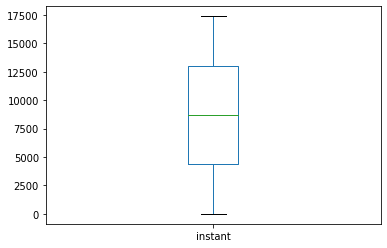

In [22]:
data["instant"].plot.box()

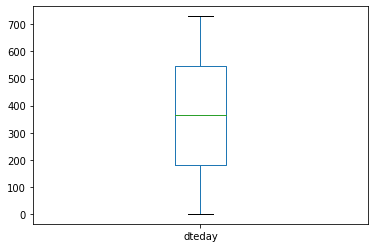

In [23]:
data["dteday"].plot.box()

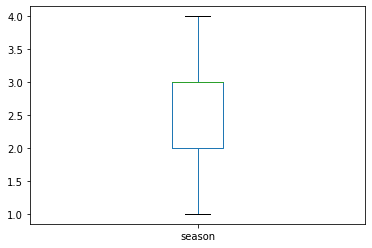

In [24]:
data["season"].plot.box()

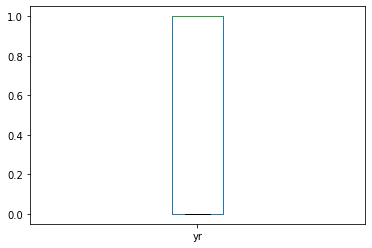

In [25]:
data["yr"].plot.box()

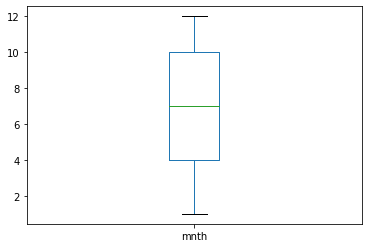

In [26]:
data["mnth"].plot.box()

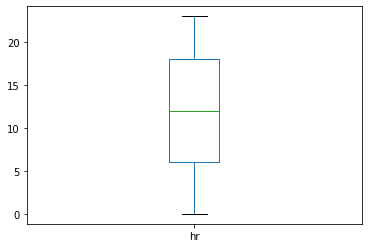

In [27]:
data["hr"].plot.box()

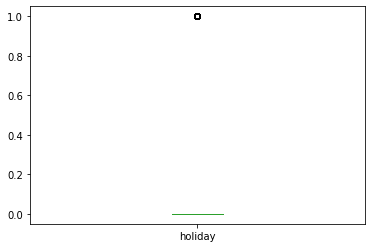

In [28]:
data["holiday"].plot.box()

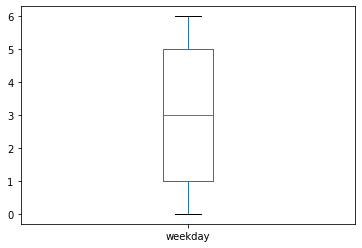

In [29]:
data["weekday"].plot.box()

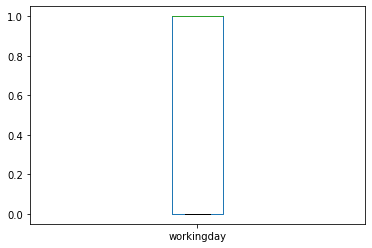

In [30]:
data["workingday"].plot.box()

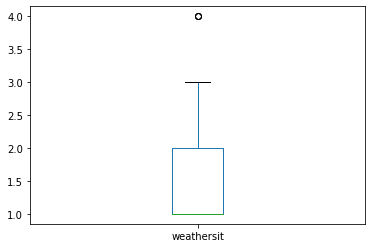

In [31]:
data["weathersit"].plot.box()

# REMOVING OUTLIERS

In [32]:
from scipy.stats import zscore

In [33]:
z=np.abs(zscore(data))
z

array([[1.73195115, 1.72570574, 1.3566343 , ..., 0.66275506, 0.93018925,
        0.95633924],
       [1.73175182, 1.72570574, 1.3566343 , ..., 0.56134262, 0.80465484,
        0.82402209],
       [1.73155249, 1.72570574, 1.3566343 , ..., 0.62219008, 0.83769021,
        0.8681278 ],
       ...,
       [1.73155249, 1.04737251, 1.3566343 , ..., 0.58162511, 0.46769408,
        0.54836135],
       [1.73175182, 1.04737251, 1.3566343 , ..., 0.45993017, 0.69894166,
        0.70824458],
       [1.73195115, 1.04737251, 1.3566343 , ..., 0.48021266, 0.77161947,
        0.77440315]])

In [34]:
thresholds=3
print(np.where(z>3))

(array([  265,   372,   373, ..., 17341, 17343, 17344], dtype=int64), array([13,  6,  6, ..., 13, 13, 13], dtype=int64))


In [35]:
data_new=data[(z<3).all(axis=1)]
data_new.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
data_new.skew()

instant       0.065496
dteday       -0.000268
season       -0.001745
yr            0.072604
mnth          0.001745
hr            0.040502
holiday       0.000000
weekday      -0.033635
workingday   -0.952375
weathersit    1.195608
temp          0.032055
atemp        -0.047799
hum          -0.113191
windspeed     0.399708
casual        1.811459
registered    1.195922
cnt           0.967983
dtype: float64

# VISUALIZATION

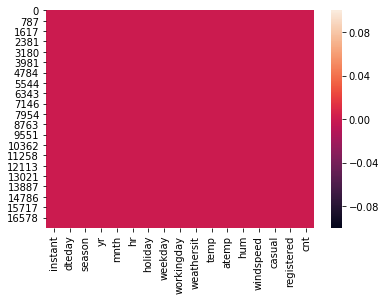

In [37]:
sns.heatmap(data_new.isnull())

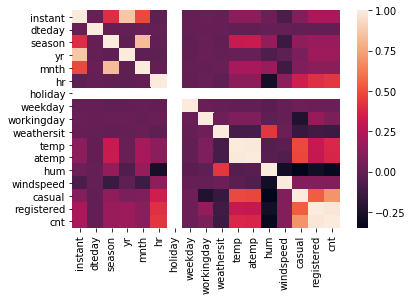

In [38]:
sns.heatmap(data_new.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C1297B8>,
      dtype=object)

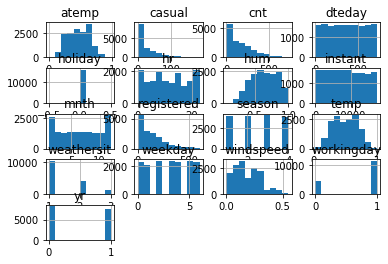

In [39]:
data_new.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000ED08208>,
      dtype=object)

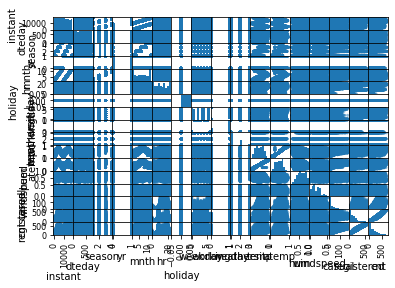

In [40]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_new)

# SPLITTING INTO X AND Y

In [41]:
x=data_new.drop("cnt",axis=1)
x.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,2,0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,3,0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,4,0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,5,0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [42]:
y=data_new["cnt"]
y

0         16
1         40
2         32
3         13
4          1
5          1
6          2
7          3
8          8
9         14
10        36
11        56
12        84
13        94
14       106
15       110
16        93
17        67
18        35
19        37
20        36
21        34
22        28
23        39
24        17
25        17
26         9
27         6
28         3
29         2
        ... 
17349    125
17350    102
17351     72
17352     47
17353     36
17354     49
17355     34
17356     19
17357     11
17358      1
17359      3
17360      9
17361     40
17362     85
17363    196
17364    157
17365    120
17366    157
17367    224
17368    203
17369    247
17370    315
17371    214
17372    164
17373    122
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 15934, dtype: int64

# TRAINING AND TESTING PHASE

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=100)

In [44]:
x_train.shape

(12428, 16)

In [45]:
x_test.shape

(3506, 16)

In [46]:
y_train.shape

(12428,)

In [47]:
y_test.shape

(3506,)

# APPLYING ALGORITHMS

In [48]:
lr=LinearRegression()

In [49]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
predlr=lr.predict(x_test)

In [51]:
print(lr.score(x_train,y_train))

1.0


In [52]:
print(r2_score(y_test,predlr))

1.0


In [53]:
print(mean_squared_error(y_test,predlr))

2.6800547979187545e-23


In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [55]:
kfold=KFold(n_splits=10, random_state=0)
model=LinearRegression()
print(cross_val_score(model, x, y, cv=kfold))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [56]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
dtr = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=4,
                            max_leaf_nodes=20)
dtr.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=20, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [60]:
dtr.score(x,y)

0.9756402619865109

In [61]:
#save the model
from sklearn.externals import joblib
joblib.dump(lr,"bikes.pkl")

['bikes.pkl']